In [2]:
import spotipy 
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import joypy 
import seaborn as sns

**Connect with Spotify API**

In [3]:
#my own key on spotify
client_id = "170f9613620d4d9db93bd9722bb392c8"
client_secret = "bb77dffbfdd4432d81341139218c6e81"
redirect_uri = 'http://localhost:9000'

In [4]:
scope = 'user-read-recently-played'
sp = spotipy.Spotify(
    auth_manager=SpotifyOAuth(
        scope = scope,
        client_id = client_id,
        client_secret=client_secret,
        redirect_uri=redirect_uri
    )
)

In [5]:
#Running API
results = sp.current_user_recently_played()

In [6]:
#Test API with searching my lattest playing list on Spotify
song = []
artists = []
for num, items in enumerate(results['items']):
    track_name = items['track']['name']
    artist_name = items['track']['artists'][0]['name']
    artists.append(artist_name)
    song.append(track_name)
    song_frame = pd.DataFrame({
        'Songs':song,
        'Artists':artists
    })
song_frame.head()

,Songs,Artists
0,Lonely Ones,LOVA
1,could you love me while i hate myself,Zeph
2,Anti-Hero - Acoustic Version,Taylor Swift
3,"Would've, Could've, Should've",Taylor Swift
4,What If I Love You,Gatlin


# Let's extract data from spotify
1) song_id
2) album_id
3) song_name
4) album_name
5) release_date (of each song/album)
6) song_features
7) popularity (of each song)

I will extract each columns respectively as same as the order above

**Extract first 4 columns**

First, I extract song_id, album_id, song_name, album_name 

In [7]:
#Get info of Taylor's profile on spotify
taylor = sp.artist('06HL4z0CvFAxyc27GXpf02')
taylor

{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
 'followers': {'href': None, 'total': 65015515},
 'genres': ['pop'],
 'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
 'id': '06HL4z0CvFAxyc27GXpf02',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5eb5a00969a4698c3132a15fbb0',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab676161000051745a00969a4698c3132a15fbb0',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f1785a00969a4698c3132a15fbb0',
   'width': 160}],
 'name': 'Taylor Swift',
 'popularity': 99,
 'type': 'artist',
 'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}

In [8]:
#get all Taylor's albums
taylor_albums = sp.artist_albums(taylor['id'],limit=50)


In [9]:
#Create a dataframe include albums name and album id
album_name_list = []
album_id_list = []
for item in taylor_albums['items']:
    al_name = item['name']
    al_id = item['id']
    album_name_list.append(al_name)
    album_id_list.append(al_id)
pre_cleaned_album = pd.DataFrame({
    'album_name':album_name_list,
    'album_id':album_id_list
})
pre_cleaned_album

,album_name,album_id
0,Midnights (3am Edition),3lS1y25WAhcqJDATJK70Mq
1,Midnights (3am Edition),4894htPwC6zoiuTqUQwn4I
2,Midnights,151w1FgRZfnKZA9FEcg9Z3
3,Midnights,4moVP48t9bji7djUc5VOvi
4,Red (Taylor's Version),6kZ42qRrzov54LcAk4onW9
5,Red (Taylor's Version),6x9s2ObPdpATZgrwxsk9c0
6,Fearless (Taylor's Version),4hDok0OAJd57SGIT8xuWJH
7,evermore (deluxe version),6AORtDjduMM3bupSWzbTSG
8,evermore (deluxe version),1DT6fDJL6AWPJxe7Lq1dPb
9,evermore,2Xoteh7uEpea4TohMxjtaq


**Clean data**

As we see in the list of album, there are many repost albums. Therefore, 1 album have another copies of its. Based on the analysis purpose, we need eliminate all repost albums to extract original ones

In [10]:
#drop albums have special words in that name
special_words = 'Remix|Version|Karaoke|Special|Edition|Live|Tour'
album = (pre_cleaned_album
                .loc[~pre_cleaned_album['album_name']
                .str.contains(special_words,case = False)]
                .drop_duplicates(subset='album_name')
                .reset_index(drop=True)
                )
album

,album_name,album_id
0,Midnights,151w1FgRZfnKZA9FEcg9Z3
1,evermore,2Xoteh7uEpea4TohMxjtaq
2,folklore,2fenSS68JI1h4Fo296JfGr
3,Lover,1NAmidJlEaVgA3MpcPFYGq
4,reputation,6DEjYFkNZh67HP7R9PSZvv
5,1989,2QJmrSgbdM35R67eoGQo4j
6,Red,1EoDsNmgTLtmwe1BDAVxV5
7,Speak Now,5MfAxS5zz8MlfROjGQVXhy
8,Fearless,2dqn5yOQWdyGwOpOIi9O4x
9,Taylor Swift,7mzrIsaAjnXihW3InKjlC3


**Go back to gather more song data**

Once we have no duplicate album, each album we only have 1 copies, now we use album_id to extract song name and id

In [11]:
album_list = zip(album['album_name'].to_list(),
                album['album_id'].to_list())
album_list = list(album_list)

In [12]:
#Create song dataframe with song name, song id and relevant album information
#in this step, we use album_id extracted to get song information in each album
song_name = []
song_id = []
song_album = []
song_album_id = []
for name, id in album_list: 
    album = sp.album_tracks(id, limit=50, offset = 0, market=None)['items']
    for song in album:
        s_name = song['name']
        s_id = song['id']
        song_name.append(s_name)
        song_id.append(s_id)
        song_album.append(name)
        song_album_id.append(id)

song_df = pd.DataFrame({
        "song_name" : song_name,
        "song_id" : song_id,
        'album':song_album,
        "album_id":song_album_id
        })
song_df.head()

,song_name,song_id,album,album_id
0,Lavender Haze,5jQI2r1RdgtuT8S3iG8zFC,Midnights,151w1FgRZfnKZA9FEcg9Z3
1,Maroon,3eX0NZfLtGzoLUxPNvRfqm,Midnights,151w1FgRZfnKZA9FEcg9Z3
2,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,Midnights,151w1FgRZfnKZA9FEcg9Z3
3,Snow On The Beach (feat. Lana Del Rey),1wtOxkiel43cVs0Yux5Q4h,Midnights,151w1FgRZfnKZA9FEcg9Z3
4,"You're On Your Own, Kid",4D7BCuvgdJlYvlX5WlN54t,Midnights,151w1FgRZfnKZA9FEcg9Z3


**The next step is get release date of each song**

Because song release with album, so the release date of each song is also the same as release date of its album

In [13]:
#Get release_date from Spotify API, then add it to song_df
song_id = song_df['song_id'].to_list()
release_date_list = []
for id in song_id: 
    date = sp.track(id)['album']['release_date']
    release_date_list.append(date)
release_date = pd.Series(release_date_list)
song_df['release_date'] = release_date  
song_df.head()


,song_name,song_id,album,album_id,release_date
0,Lavender Haze,5jQI2r1RdgtuT8S3iG8zFC,Midnights,151w1FgRZfnKZA9FEcg9Z3,2022-10-21
1,Maroon,3eX0NZfLtGzoLUxPNvRfqm,Midnights,151w1FgRZfnKZA9FEcg9Z3,2022-10-21
2,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,Midnights,151w1FgRZfnKZA9FEcg9Z3,2022-10-21
3,Snow On The Beach (feat. Lana Del Rey),1wtOxkiel43cVs0Yux5Q4h,Midnights,151w1FgRZfnKZA9FEcg9Z3,2022-10-21
4,"You're On Your Own, Kid",4D7BCuvgdJlYvlX5WlN54t,Midnights,151w1FgRZfnKZA9FEcg9Z3,2022-10-21


In [14]:
#Because song released in the album, release date of song is also release date of album 
song_df['release_date'].unique()

array(['2022-10-21', '2020-12-11', '2020-07-24', '2019-08-23',
       '2017-11-10', '2014-10-27', '2012-10-22', '2010-10-25',
       '2008-11-11', '2006-10-24'], dtype=object)

**Explore feature of each song**

there are so many types of song feature, but I just retrieve only those relevant for my analysis: 
- acousticness
- energy
- valence

You can explore song feature here: https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features

In [15]:
#Get song feature, then add it to song_df
song_id = song_df['song_id'].to_list()
energy_list = []
acousticness_list = []
valence_list = []
for id in song_id: 
    feature = sp.audio_features(id)
    energy = feature[0]['energy']
    acousticness = feature[0]['acousticness']
    valence =  feature[0]['valence']
    energy_list.append(energy)
    acousticness_list.append(acousticness)
    valence_list.append(valence)

song_df = song_df.assign(
    energy = energy_list,
    acousticness = acousticness_list,
    valence = valence_list
)
song_df

,song_name,song_id,album,album_id,release_date,energy,acousticness,valence
0,Lavender Haze,5jQI2r1RdgtuT8S3iG8zFC,Midnights,151w1FgRZfnKZA9FEcg9Z3,2022-10-21,0.436,0.25800,0.0976
1,Maroon,3eX0NZfLtGzoLUxPNvRfqm,Midnights,151w1FgRZfnKZA9FEcg9Z3,2022-10-21,0.398,0.05730,0.0374
2,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,Midnights,151w1FgRZfnKZA9FEcg9Z3,2022-10-21,0.643,0.13000,0.5330
3,Snow On The Beach (feat. Lana Del Rey),1wtOxkiel43cVs0Yux5Q4h,Midnights,151w1FgRZfnKZA9FEcg9Z3,2022-10-21,0.319,0.69000,0.1930
4,"You're On Your Own, Kid",4D7BCuvgdJlYvlX5WlN54t,Midnights,151w1FgRZfnKZA9FEcg9Z3,2022-10-21,0.396,0.40100,0.3800
...,...,...,...,...,...,...,...,...
143,Our Song,15DeqWWQB4dcEWzJg15VrN,Taylor Swift,7mzrIsaAjnXihW3InKjlC3,2006-10-24,0.672,0.11100,0.5390
144,I'm Only Me When I'm With You,0JIdBrXGSJXS72zjF9ss9u,Taylor Swift,7mzrIsaAjnXihW3InKjlC3,2006-10-24,0.934,0.00452,0.5180
145,Invisible,5OOd01o2YS1QFwdpVLds3r,Taylor Swift,7mzrIsaAjnXihW3InKjlC3,2006-10-24,0.394,0.63700,0.2330
146,A Perfectly Good Heart,1spLfUJxtyVyiKKTegQ2r4,Taylor Swift,7mzrIsaAjnXihW3InKjlC3,2006-10-24,0.751,0.00349,0.2680


**Now, we extract popularity of each song**

Because there are many repost tracks of each song, so the popularity of each song depends on what version audience listen. To solve this problem, for each song, I will choose the track having the highest popularity, that present popularity for that song. 

In [16]:
#first, I need to extract all songs that are in pre-cleaning step
#Create song dataframe with some name, song id and album info
song_name = []
song_id = []
full_album_list = zip(
                pre_cleaned_album['album_name'].to_list(),
                pre_cleaned_album['album_id'].to_list())
for name, id in list(full_album_list): 
    album = sp.album_tracks(id, limit=50, offset = 0, market=None)['items']
    for song in album:
        s_name = song['name']
        s_id = song['id']
        song_name.append(s_name)
        song_id.append(s_id)

song_for_popularity = pd.DataFrame({
        "song_name" : song_name,
        "song_id" : song_id,
        })
song_for_popularity


,song_name,song_id
0,Lavender Haze,4g2c7NoTWAOSYDy44l9nub
1,Maroon,199E1RRrVmVTQqBXih5qRC
2,Anti-Hero,02Zkkf2zMkwRGQjZ7T4p8f
3,Snow On The Beach (feat. Lana Del Rey),6ADDIJxxqzM9LMpm78yzQG
4,"You're On Your Own, Kid",7gVWKBcfIW93YxNBi3ApIE
...,...,...
913,Anti-Hero (feat. Bleachers),7mz1Dj0C0sa8tG3ykgtLpD
914,Anti-Hero - Roosevelt Remix,2G19YDBzl32ASNiRJ1sT9s
915,Anti-Hero - Kungs Remix,1h0GRtSo5NeVVb1vqb5Uh1
916,Anti-Hero - Jayda G Remix,22t8PQeP5klRoguomM4wZp


In [17]:
#once we have all song name and id, we use id to extract popularity of each tracks
full_song_id = song_for_popularity['song_id'].to_list()
popularity_list = []
for track_id in full_song_id: 
    popularity = sp.track(track_id)['popularity']
    popularity_list.append(popularity)
song_for_popularity['popularity'] = popularity_list
song_for_popularity

,song_name,song_id,popularity
0,Lavender Haze,4g2c7NoTWAOSYDy44l9nub,83
1,Maroon,199E1RRrVmVTQqBXih5qRC,83
2,Anti-Hero,02Zkkf2zMkwRGQjZ7T4p8f,84
3,Snow On The Beach (feat. Lana Del Rey),6ADDIJxxqzM9LMpm78yzQG,82
4,"You're On Your Own, Kid",7gVWKBcfIW93YxNBi3ApIE,83
...,...,...,...
913,Anti-Hero (feat. Bleachers),7mz1Dj0C0sa8tG3ykgtLpD,44
914,Anti-Hero - Roosevelt Remix,2G19YDBzl32ASNiRJ1sT9s,46
915,Anti-Hero - Kungs Remix,1h0GRtSo5NeVVb1vqb5Uh1,52
916,Anti-Hero - Jayda G Remix,22t8PQeP5klRoguomM4wZp,56


In [18]:
#Let's extract the maximum number of each track, put it into song_df
cleaned_song_list = song_df['song_name'].to_list()
popularity_final_list = []
for song in cleaned_song_list:
    mark = (song_for_popularity['song_name'].str.contains(song)) | (song_for_popularity['song_name'] == song)
    popularity = (song_for_popularity
                    .loc[mark]['popularity']
                    .max()
                    )
    popularity_final_list.append(popularity)

song_df['popularity'] = popularity_final_list
song_df = song_df.drop('album_id', 1)
song_df


/var/folders/70/3whxqt_j51b6kx783xwzklbw0000gn/T/ipykernel_12031/140025860.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mark = (song_for_popularity['song_name'].str.contains(song)) | (song_for_popularity['song_name'] == song)
/var/folders/70/3whxqt_j51b6kx783xwzklbw0000gn/T/ipykernel_12031/140025860.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  song_df = song_df.drop('album_id', 1)


,song_name,song_id,album,release_date,energy,acousticness,valence,popularity
0,Lavender Haze,5jQI2r1RdgtuT8S3iG8zFC,Midnights,2022-10-21,0.436,0.25800,0.0976,89
1,Maroon,3eX0NZfLtGzoLUxPNvRfqm,Midnights,2022-10-21,0.398,0.05730,0.0374,86
2,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,Midnights,2022-10-21,0.643,0.13000,0.5330,96
3,Snow On The Beach (feat. Lana Del Rey),1wtOxkiel43cVs0Yux5Q4h,Midnights,2022-10-21,0.319,0.69000,0.1930,87
4,"You're On Your Own, Kid",4D7BCuvgdJlYvlX5WlN54t,Midnights,2022-10-21,0.396,0.40100,0.3800,86
...,...,...,...,...,...,...,...,...
143,Our Song,15DeqWWQB4dcEWzJg15VrN,Taylor Swift,2006-10-24,0.672,0.11100,0.5390,70
144,I'm Only Me When I'm With You,0JIdBrXGSJXS72zjF9ss9u,Taylor Swift,2006-10-24,0.934,0.00452,0.5180,56
145,Invisible,5OOd01o2YS1QFwdpVLds3r,Taylor Swift,2006-10-24,0.394,0.63700,0.2330,52
146,A Perfectly Good Heart,1spLfUJxtyVyiKKTegQ2r4,Taylor Swift,2006-10-24,0.751,0.00349,0.2680,51


**Gather song genres from lastfm API**

Since Spotify doesn't provide song genres for each track, This is what I do to get song genres: 
- Gather tags of each track on Lastfm, which including multiple information about the song
- then filter song-genres-related tags of each song by filtering tags through all song genres from everynoise: https://everynoise.com/everynoise1d.cgi?scope=all

In [19]:
#import all music genres data from Everynoise, there are 5993 song genres
all_genres = pd.read_csv('all_song_genres.csv', names = ['genres'])
all_genres.describe()

,genres
count,5993
unique,5993
top,pop
freq,1


In [20]:
all_genres = all_genres['genres'].to_list()
all_genres[:10]

['pop',
 'dance pop',
 'rap',
 'rock',
 'hip hop',
 'urbano latino',
 'pop rap',
 'reggaeton',
 'edm',
 'trap']

**Connect to LastFM API**

In [21]:
API_KEY = "25ea0df7b7e246e8da5c6351c451bedc" 
API_SECRET = "24b3558643b72e9391056bb237423e9d"

USER_AGENT = 'hoang lui'


In [22]:
#Test the LastFM API
headers = {
    'user-agent': USER_AGENT
}

payload = {
    'api_key': API_KEY,
    'user':'hoanglui',
    'method': 'track.getTopTags',
    "artist":"Taylor Swift",
    'track':'Stay Stay Stay',
    'format': 'json'
}

r = requests.get('https://ws.audioscrobbler.com/2.0/', headers=headers, params=payload)
r.status_code

200

In [23]:
#Now, we create a function that take top 10 tags of the song input
headers = {
    'user-agent':USER_AGENT
}

payload = {
    'api_key': API_KEY,
    'user':'hoanglui',
    'method': 'track.getTopTags',
    "artist":"Taylor Swift",
    'format': 'json'
}

def get_tags(song_name):
    payload['track'] = song_name
    r = requests.get('https://ws.audioscrobbler.com/2.0/', headers=headers, params=payload)
    tags_dict = r.json()['toptags']['tag']
    tags_list = []
    for items in tags_dict: 
        tag = items['name']
        tags_list.append(tag)
    return tags_list[:6]

In [24]:
#Create the function get only those are music genres
def get_genres(tags_list):
    music_genres = []
    for tags in tags_list: 
        for genres in all_genres:
            if tags in genres and tags not in ['singer-songwriter', 'american', 'chill', 'gospel'] :
                music_genres.append(tags)
                break
    return music_genres

In [25]:
#Test the get_tags and get_genres function
test = get_tags('Lavender Haze')
get_genres(test)

['pop', 'electronic', 'dream pop', 'synthpop', 'electropop']

In [26]:
#Now I will create new columns: music genres for each track
song_name = song_df['song_name'].to_list()
genres_list = []
for name in song_name:
    raw_tags = get_tags(name)
    m_genres = get_genres(raw_tags)
    genres_list.append(m_genres)
song_df['genres'] = genres_list 
song_df.head()


,song_name,song_id,album,release_date,energy,acousticness,valence,popularity,genres
0,Lavender Haze,5jQI2r1RdgtuT8S3iG8zFC,Midnights,2022-10-21,0.436,0.2580,0.0976,89,"[pop, electronic, dream pop, synthpop, electro..."
1,Maroon,3eX0NZfLtGzoLUxPNvRfqm,Midnights,2022-10-21,0.398,0.0573,0.0374,86,"[shoegaze, pop, dream pop, synthpop, chillwave]"
2,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,Midnights,2022-10-21,0.643,0.1300,0.5330,96,"[pop, synthpop, pop rock]"
3,Snow On The Beach (feat. Lana Del Rey),1wtOxkiel43cVs0Yux5Q4h,Midnights,2022-10-21,0.319,0.6900,0.1930,87,"[dream pop, pop, synthpop, electronic]"
4,"You're On Your Own, Kid",4D7BCuvgdJlYvlX5WlN54t,Midnights,2022-10-21,0.396,0.4010,0.3800,86,"[pop, dream pop, synthpop, electronic, electro..."


**Optimize dataframe**

After finish collect data, I will optimize memory usage of dataframe by changing data type on each column

In [27]:
#track memory usage 
song_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   song_name     148 non-null    object 
 1   song_id       148 non-null    object 
 2   album         148 non-null    object 
 3   release_date  148 non-null    object 
 4   energy        148 non-null    float64
 5   acousticness  148 non-null    float64
 6   valence       148 non-null    float64
 7   popularity    148 non-null    int64  
 8   genres        148 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 58.4 KB


In [28]:
#Change data type
song_df = song_df.astype({
    'song_name':'string', 
    'song_id':'string',
    'album':'category',
    'release_date':'datetime64',
    'energy':'float16',
    'acousticness':'float16',
    'valence':'float16',
    'popularity':'int8',
})

<AxesSubplot: title={'center': 'fluency of genres in top 10 popularity'}>

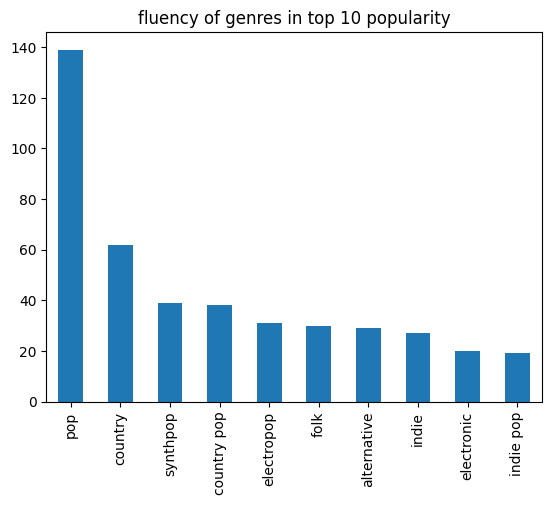

In [29]:
top_10_popularity = (song_df
    .sort_values('popularity', ascending = False)
    ['genres']
    .explode('genres')
    .reset_index(drop = True)
)
(top_10_popularity
    .value_counts()
    .head(10)
    .plot.bar(
        title = 'fluency of genres in top 10 popularity'
    )    
)

In [30]:
# song_name_new = []
# for i in name: 
#     new_name = i.title()
#     if '(' in i:
#         pos = i.find('(')
#         new_name = i[:pos-1]
#     if '-' in i:
#         pos = i.find('-')
#         new_name = i[:pos-1]

#     song_name_new.append(new_name)



In [31]:
import re

def titlecase(s):
    return re.sub(r"[A-Za-z]+('[A-Za-z]+)?",
     lambda mo: mo.group(0)[0].upper() +
     mo.group(0)[1:].lower(),
     s)

text = "He's an engineer, isn't he?"
print(titlecase(text))


He's An Engineer, Isn't He?


In [32]:
hot_100_df = pd.read_csv('dataset/hot_100_df.csv')

In [33]:
hot_100_df = hot_100_df.drop('Unnamed: 0', 1)

/var/folders/70/3whxqt_j51b6kx783xwzklbw0000gn/T/ipykernel_12031/674231025.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  hot_100_df = hot_100_df.drop('Unnamed: 0', 1)


In [34]:
# make the name lower case
song_df['song_name'] = song_df['song_name'].str.lower()
hot_100_df['Billboard Hot 100'] = hot_100_df['Billboard Hot 100'].str.lower()

**Eliminate all suffix () and -, replace '**

In [35]:
#eliminate all in song_df
new_name_list = []
for i in song_df['song_name'].to_list():
    name =  (
                i
                    .replace('’',"'")
                    .replace(' - radio single remix', '')
                    .replace(' - pop version', '')
            )
    if '(' in name:
        pos = name.find('(')
        new_name_list.append(name[:pos-1])
    else:
        new_name_list.append(name)
song_df['song_name'] = new_name_list

In [36]:
#eliminate all in hot_100_df
new_name_list = []
for i in hot_100_df['Billboard Hot 100'].to_list():
    if '(' in i: 
        pos = i.find('(')
        new_name_list.append(i[:pos-1])
    else:
        new_name_list.append(i)
new_name_list
hot_100_df['Billboard Hot 100'] = new_name_list

In [37]:
mainset_hot_100 = song_df.merge(
    hot_100_df,
    how = 'left',
    left_on=['song_name'],
    right_on=['Billboard Hot 100']
)


In [38]:
mainset_hot_100

,song_name,song_id,album,release_date,energy,acousticness,valence,popularity,genres,Billboard Hot 100,Debut Date,Peak Pos.,Peak Date,Wks on Chart
0,lavender haze,5jQI2r1RdgtuT8S3iG8zFC,Midnights,2022-10-21,0.436035,0.258057,0.097595,89,"[pop, electronic, dream pop, synthpop, electro...",lavender haze,11.05.22,2.0,11.05.22,9.0
1,maroon,3eX0NZfLtGzoLUxPNvRfqm,Midnights,2022-10-21,0.397949,0.057312,0.037415,86,"[shoegaze, pop, dream pop, synthpop, chillwave]",maroon,11.05.22,3.0,11.05.22,7.0
2,anti-hero,0V3wPSX9ygBnCm8psDIegu,Midnights,2022-10-21,0.643066,0.130005,0.533203,96,"[pop, synthpop, pop rock]",anti-hero,11.05.22,1.0,11.05.22,9.0
3,snow on the beach,1wtOxkiel43cVs0Yux5Q4h,Midnights,2022-10-21,0.319092,0.689941,0.192993,87,"[dream pop, pop, synthpop, electronic]",snow on the beach,11.05.22,4.0,11.05.22,6.0
4,"you're on your own, kid",4D7BCuvgdJlYvlX5WlN54t,Midnights,2022-10-21,0.395996,0.400879,0.379883,86,"[pop, dream pop, synthpop, electronic, electro...","you're on your own, kid",11.05.22,8.0,11.05.22,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,our song,15DeqWWQB4dcEWzJg15VrN,Taylor Swift,2006-10-24,0.671875,0.111023,0.539062,70,"[country, pop, fun]",our song,10.13.07,16.0,01.19.08,36.0
160,i'm only me when i'm with you,0JIdBrXGSJXS72zjF9ss9u,Taylor Swift,2006-10-24,0.934082,0.004520,0.518066,56,"[country, pop]",NaN,NaN,NaN,NaN,NaN
161,invisible,5OOd01o2YS1QFwdpVLds3r,Taylor Swift,2006-10-24,0.394043,0.637207,0.233032,52,"[country, sad]",NaN,NaN,NaN,NaN,NaN
162,a perfectly good heart,1spLfUJxtyVyiKKTegQ2r4,Taylor Swift,2006-10-24,0.750977,0.003490,0.268066,51,"[country, happy]",NaN,NaN,NaN,NaN,NaN


In [39]:
mainset_hot_100.to_csv('mainset_and_hot100.csv')

In [40]:
mainset_hot_100[['song_name','genres']].explode('genres').to_csv('song_genres.csv')

In [43]:
mainset_hot_100['Peak Pos.'].describe()

count    138.000000
mean      37.318841
std       29.294125
min        1.000000
25%       10.000000
50%       33.500000
75%       63.000000
max       94.000000
Name: Peak Pos., dtype: float64

In [44]:
condition = [
    mainset_hot_100['Peak Pos.'] <= 5,
    (mainset_hot_100['Peak Pos.'] > 5) & (mainset_hot_100['Peak Pos.'] <= 20),
    (mainset_hot_100['Peak Pos.'] > 20) & (mainset_hot_100['Peak Pos.'] <= 50),
    (mainset_hot_100['Peak Pos.'] > 50) & (mainset_hot_100['Peak Pos.'] < 100)
]
choices = ['Top 1-5', 'Top 5-20', 'Top 20-50','Top 50-100']

mainset_hot_100['group_chart'] = np.select(condition, choices, default = np.NaN)
mainset_hot_100

,song_name,song_id,album,release_date,energy,acousticness,valence,popularity,genres,Billboard Hot 100,Debut Date,Peak Pos.,Peak Date,Wks on Chart,group_chart
0,lavender haze,5jQI2r1RdgtuT8S3iG8zFC,Midnights,2022-10-21,0.436035,0.258057,0.097595,89,"[pop, electronic, dream pop, synthpop, electro...",lavender haze,11.05.22,2.0,11.05.22,9.0,Top 1-5
1,maroon,3eX0NZfLtGzoLUxPNvRfqm,Midnights,2022-10-21,0.397949,0.057312,0.037415,86,"[shoegaze, pop, dream pop, synthpop, chillwave]",maroon,11.05.22,3.0,11.05.22,7.0,Top 1-5
2,anti-hero,0V3wPSX9ygBnCm8psDIegu,Midnights,2022-10-21,0.643066,0.130005,0.533203,96,"[pop, synthpop, pop rock]",anti-hero,11.05.22,1.0,11.05.22,9.0,Top 1-5
3,snow on the beach,1wtOxkiel43cVs0Yux5Q4h,Midnights,2022-10-21,0.319092,0.689941,0.192993,87,"[dream pop, pop, synthpop, electronic]",snow on the beach,11.05.22,4.0,11.05.22,6.0,Top 1-5
4,"you're on your own, kid",4D7BCuvgdJlYvlX5WlN54t,Midnights,2022-10-21,0.395996,0.400879,0.379883,86,"[pop, dream pop, synthpop, electronic, electro...","you're on your own, kid",11.05.22,8.0,11.05.22,6.0,Top 5-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,our song,15DeqWWQB4dcEWzJg15VrN,Taylor Swift,2006-10-24,0.671875,0.111023,0.539062,70,"[country, pop, fun]",our song,10.13.07,16.0,01.19.08,36.0,Top 5-20
160,i'm only me when i'm with you,0JIdBrXGSJXS72zjF9ss9u,Taylor Swift,2006-10-24,0.934082,0.004520,0.518066,56,"[country, pop]",NaN,NaN,NaN,NaN,NaN,nan
161,invisible,5OOd01o2YS1QFwdpVLds3r,Taylor Swift,2006-10-24,0.394043,0.637207,0.233032,52,"[country, sad]",NaN,NaN,NaN,NaN,NaN,nan
162,a perfectly good heart,1spLfUJxtyVyiKKTegQ2r4,Taylor Swift,2006-10-24,0.750977,0.003490,0.268066,51,"[country, happy]",NaN,NaN,NaN,NaN,NaN,nan


<AxesSubplot: >

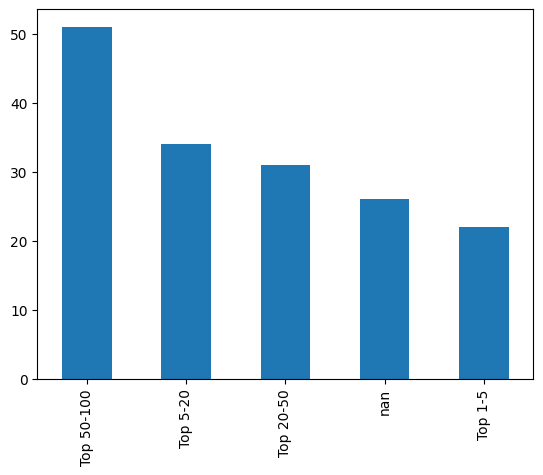

In [55]:
mainset_hot_100['group_chart'].value_counts().plot.bar()

In [56]:
mainset_hot_100.to_csv('mainset_hot_100(1).csv')